### Import Libraries and Data


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import context
from os import path

%matplotlib inline
sns.set_theme(style="whitegrid")

abundance_df = pd.read_csv(path.join(context.proj_dir, 'data', 'abundance.csv'))
print("Dataset size: {}".format(abundance_df.shape))
abundance_df.head()

Dataset size: (3610, 3513)


c:\users\ahmad\myenvs\python3-9-env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,5,9,20,26,42,47,51,52,59,61,68,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,Candela_Africa,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Candela_Africa,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Candela_Africa,H12,h12,stool,n,8,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Candela_Africa,H13,h13,stool,n,34,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Candela_Africa,H14,h14,stool,n,30,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exploring/Cleaning Dataset

In [44]:
# lets work with diabetes only
abundance_df = abundance_df.loc[(abundance_df.dataset_name=='WT2D') | (abundance_df.dataset_name=='t2dmeta_long')|
                       (abundance_df.dataset_name=='t2dmeta_short'),:]

# change missing values to nan
abundance_df = abundance_df.replace('nd', np.nan).replace('na', np.nan).replace('-', np.nan).replace(' -', np.nan)
print(abundance_df.shape)
abundance_df.head()

(508, 3513)


,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
2951,t2dmeta_long,CON-001,con-001,stool,n,21,female,china,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2952,t2dmeta_long,CON-002,con-002,stool,n,53,female,china,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2953,t2dmeta_long,CON-003,con-003,stool,n,61,female,china,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2954,t2dmeta_long,CON-004,con-004,stool,n,55,female,china,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2955,t2dmeta_long,CON-005,con-005,stool,n,53,female,china,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


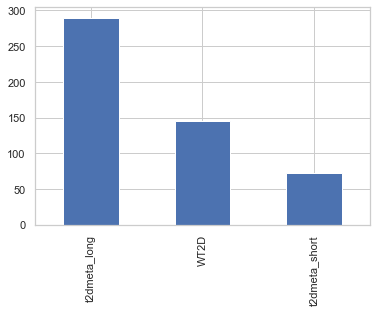

In [45]:
# unique datasets
df = abundance_df['dataset_name'].value_counts().plot.bar()

<AxesSubplot:ylabel='dataset_name'>

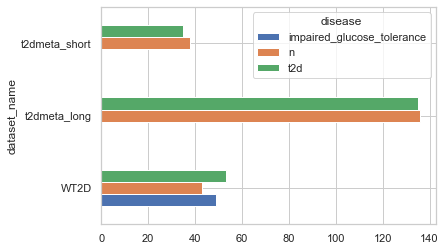

In [46]:
# Unique diseases in all datasets
abundance_df.groupby('dataset_name')['disease'].value_counts().unstack().plot.barh()

In [47]:
# divided the abundance data to metadata and species data
split_index = abundance_df.columns.get_loc('k__Archaea')
disease_metadata = abundance_df.iloc[:, 0:split_index]
disease_species = abundance_df.iloc[:, split_index:]
print("Disease Metadata: {}".format(disease_metadata.shape))
print("Disease Species: {}".format(disease_species.shape))

Disease Metadata: (508, 211)
Disease Species: (508, 3302)


In [48]:
# finding the columns with entry as na
cols = (  disease_metadata.isna().sum()  !=  len(disease_metadata)  )
# deleting the columns with every entry as na
disease_metadata_short = disease_metadata[cols[cols].index]
disease_metadata_short.shape

(508, 50)

In [49]:
# get rid of more redundant and unnecessary variables in metadata
unimportant =['subjectID', 'sequencing_technology', 'pubmedid','#SampleID',
           'diabetic','bodysite','classification']
disease_metadata_short = disease_metadata_short.drop(columns = unimportant)
disease_metadata_short.shape

(508, 43)

In [50]:
# finding the columns with max entry to zero to remove uninformative variables
# All values for species >=0, so a column with a max entry of zero means has all zeroes
cols = (  disease_species.max()  !=  0 )
#subseting the species data to informative variables
disease_species_short = disease_species[cols[cols].index]
disease_species_short.shape


(508, 1580)

In [51]:
#merge the metadata and species data together after filtering out uninformative variables
disease_short = disease_metadata_short.join(disease_species_short)
disease_short.head()


,dataset_name,sampleID,disease,age,gender,country,bmi,stage,height,weight,...,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii|t__Vibrio_furnissii_unclassified,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_sp_2_2_4,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_sp_2_2_4|t__GCF_000157055,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_fusiformis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_fusiformis|t__Lysinibacillus_fusiformis_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_sphaericus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_sphaericus|t__Lysinibacillus_sphaericus_unclassified
2951,t2dmeta_long,CON-001,n,21,female,china,26.3,stage_ii,156,64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2952,t2dmeta_long,CON-002,n,53,female,china,26.67,stage_ii,150,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2953,t2dmeta_long,CON-003,n,61,female,china,25.07,stage_ii,156,61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2954,t2dmeta_long,CON-004,n,55,female,china,25.39,stage_ii,160,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2955,t2dmeta_long,CON-005,n,53,female,china,26.67,stage_ii,150,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#all of the continuous and discrete variables in the metadata
num_var = ['age','bmi','height','weight','fbg','sbp','dbp','fins','fcp','hbalc','tg',
        'tcho','hdl','ldl','whr','wc','cholesterol','triglycerides','creatinine',
         'y-gt','fasting_glucose','fasting_insulin','hba1c','hscrp','c-peptide','tnfa',
         'il-1','cd163','years_in_sweden','glp-1','fgf-19','leptin','adiponectin',
         'gad-antibodies']
#converts all of the continuous and discrete variables to numeric
disease_short.loc[:, num_var] = disease_short.loc[:, num_var].apply(pd.to_numeric,
                                                                  errors='coerce', axis=1)
disease_short.shape

(508, 1623)

In [56]:
# replaces the missing values in cholesterol with tcho values
# tcho and cholesterol are from WT2D and T2Dmeta respectively and they both represent
# total cholesterol
s = disease_short['sampleID'].map(disease_short.set_index('sampleID')['tcho'])
disease_short['cholesterol'] = disease_short['cholesterol'].mask(disease_short['cholesterol'].isnull(), s)


In [57]:
# replaces the missing values in fasting_glucose with fbg values
# fasting_glucose and fbg are from WT2D and T2Dmeta respectively and they both represent
# fasting blood glucose
s = disease_short['sampleID'].map(disease_short.set_index('sampleID')['fbg'])
disease_short['fasting_glucose'] = disease_short['fasting_glucose'].mask(disease_short['fasting_glucose'].isnull(), s)


In [58]:
# replaces the missing values in triglycerides with tg values
# triglycerides and tg are from WT2D and T2Dmeta respectively and they both represent
# Triglyceride levels
s = disease_short['sampleID'].map(disease_short.set_index('sampleID')['tg'])
disease_short['triglycerides'] = disease_short['triglycerides'].mask(disease_short['triglycerides'].isnull(), s)

In [60]:
# replaces the missing values in fasting_insulin with fins values
# fasting_insulin and fins (Fasting Insulin Serum) are from WT2D and T2Dmeta respectively and they both represent
# fasting insulin serum
s = disease_short['sampleID'].map(disease_short.set_index('sampleID')['fins'])
disease_short['fasting_insulin'] = disease_short['fasting_insulin'].mask(disease_short['fasting_insulin'].isnull(), s)
disease_short.shape

(508, 1623)

In [61]:
#gender is not recorded for the WT2D data b/c it was a study conducted on only women.
#replace all nas with female in WT2D
mask1 = (disease_short.dataset_name == "WT2D") & (disease_short.gender.isna())
disease_short.loc[mask1, 'gender'] = 'female'

In [63]:
redundant = ['tcho','fbg','fins','tg']
disease_short = disease_short.drop(columns=redundant)
disease_short.shape

(508, 1619)

In [64]:
disease_short = disease_short.replace(['n','impaired_glucose_tolerance',"t2d"],
                                      ['No Diabetes','Pre-Diabetes',"Type 2 Diabetes"])


No handles with labels found to put in legend.


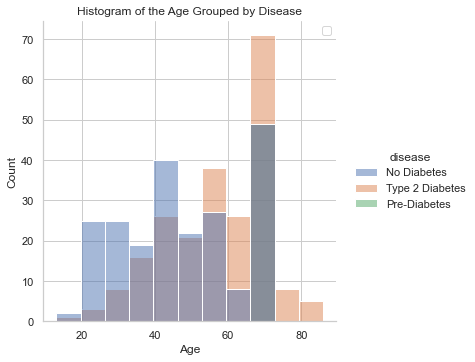

In [65]:
sns.displot(x='age',hue= "disease",data=disease_short)
# graphing a histogram by disease
plt.xlabel('Age')
plt.title('Histogram of the Age Grouped by Disease')
plt.legend()
plt.show()

No handles with labels found to put in legend.


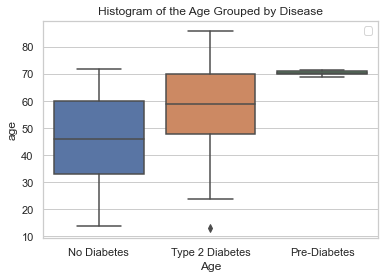

In [66]:
sns.boxplot(y='age',x= "disease",data=disease_short)
# graphing a histogram by disease
plt.xlabel('Age')
plt.title('Histogram of the Age Grouped by Disease')
plt.legend()
plt.show()


No handles with labels found to put in legend.


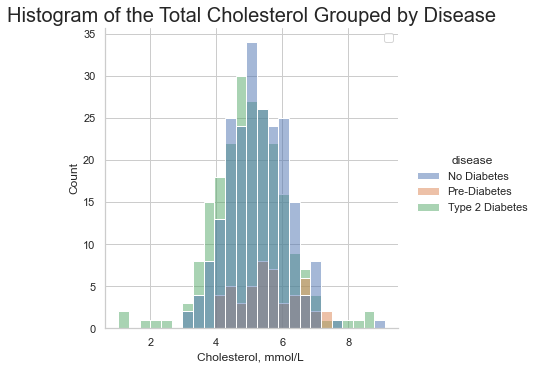

In [67]:
sns.displot(x='cholesterol',hue= "disease",data=disease_short,
            hue_order=['No Diabetes','Pre-Diabetes',"Type 2 Diabetes"])
#histogram  by disease
plt.xlabel('Cholesterol, mmol/L ')
plt.title('Histogram of the Total Cholesterol Grouped by Disease',fontsize=20)
plt.legend()
plt.show()



No handles with labels found to put in legend.


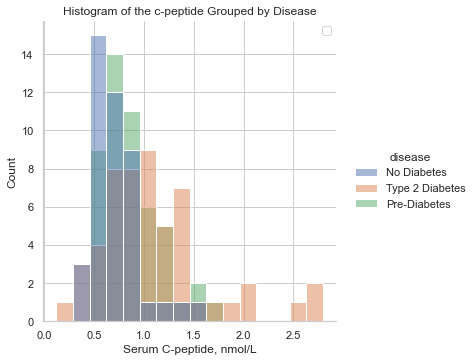

In [69]:
sns.displot(x='c-peptide',hue= "disease",data=disease_short)
#graphing a histogram
plt.xlabel('Serum C-peptide, nmol/L')
plt.title('Histogram of the c-peptide Grouped by Disease')
plt.legend()
plt.show()

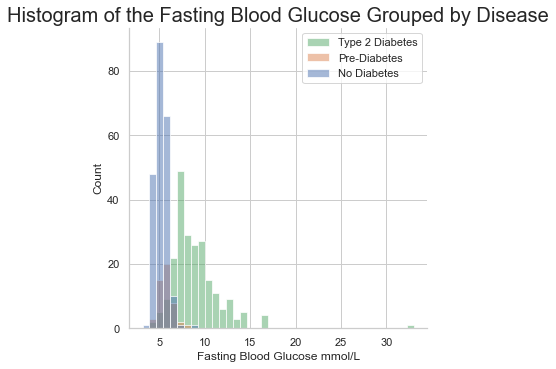

In [71]:
sns.displot(x='fasting_glucose',hue= "disease",data=disease_short,
            hue_order=['No Diabetes','Pre-Diabetes',"Type 2 Diabetes"],legend=False)
#graphing a histogram
plt.xlabel('Fasting Blood Glucose mmol/L')
plt.title('Histogram of the Fasting Blood Glucose Grouped by Disease',fontsize=20)
plt.legend(labels=["Type 2 Diabetes",'Pre-Diabetes','No Diabetes'])
plt.show()

No handles with labels found to put in legend.


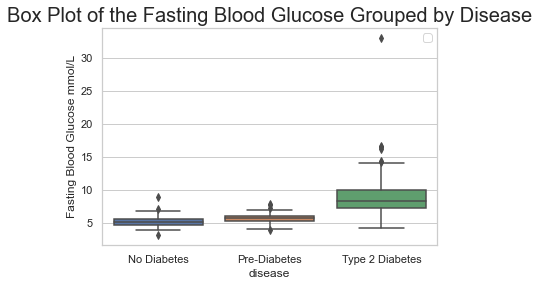

In [72]:
sns.boxplot(y='fasting_glucose',x='disease', data=disease_short,
           order=['No Diabetes','Pre-Diabetes',"Type 2 Diabetes"])
plt.ylabel('Fasting Blood Glucose mmol/L')
plt.title('Box Plot of the Fasting Blood Glucose Grouped by Disease',fontsize=20)
plt.legend()
plt.show()


No handles with labels found to put in legend.


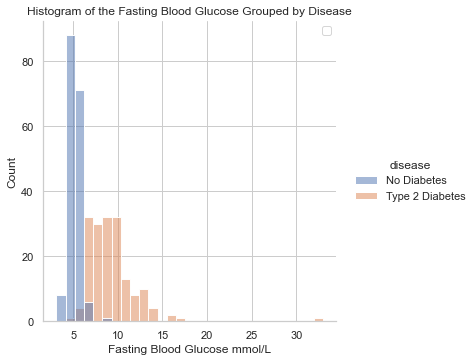

In [73]:
sns.displot(x='fasting_glucose',hue= "disease",data=disease_short[disease_short.dataset_name!="WT2D"])
#graphing a histogram
plt.xlabel('Fasting Blood Glucose mmol/L')
plt.title('Histogram of the Fasting Blood Glucose Grouped by Disease')
plt.legend()
plt.show()


No handles with labels found to put in legend.


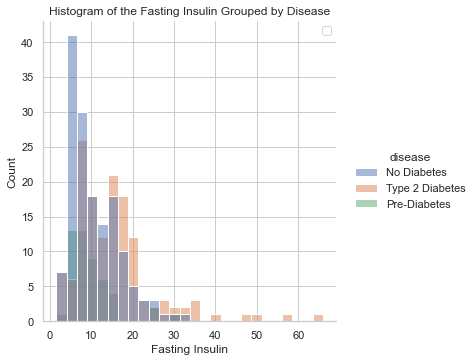

In [75]:
sns.displot(x='fasting_insulin',hue= "disease",data=disease_short)
#graphing a histogram
plt.xlabel('Fasting Insulin')
plt.title('Histogram of the Fasting Insulin Grouped by Disease')
plt.legend()
plt.show()

No handles with labels found to put in legend.


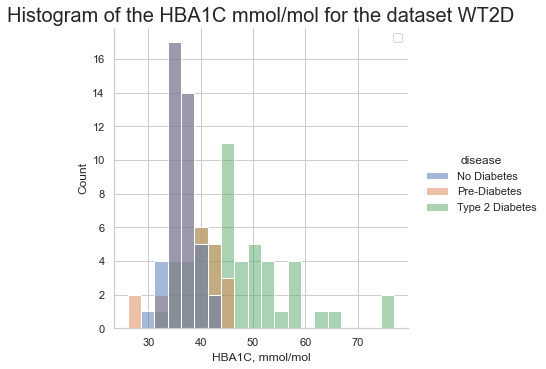

In [78]:
sns.displot(x='hba1c',hue= "disease",data=disease_short,
            hue_order=['No Diabetes','Pre-Diabetes',"Type 2 Diabetes"])
#graphing a histogram
plt.xlabel('HBA1C, mmol/mol')
plt.title('Histogram of the HBA1C mmol/mol for the dataset WT2D',fontsize=20)
plt.legend()
plt.show()


No handles with labels found to put in legend.


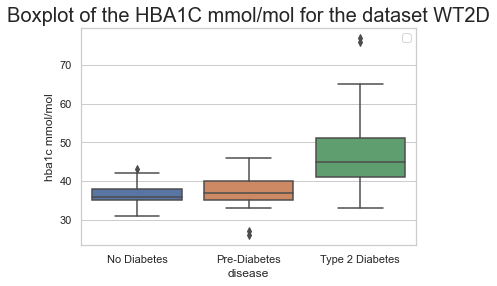

In [80]:
sns.boxplot(y='hba1c',x='disease', data=disease_short,
            order=['No Diabetes','Pre-Diabetes',"Type 2 Diabetes"])
#graphing a histogram
plt.ylabel('hba1c mmol/mol')
#labels=['No Diabetes','Pre-Diabetes',"Type 2 Diabetes"]
plt.title('Boxplot of the HBA1C mmol/mol for the dataset WT2D',fontsize=20)
plt.legend()
plt.show()



No handles with labels found to put in legend.


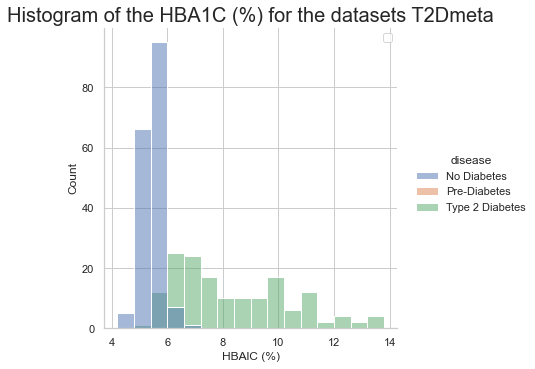

In [82]:
sns.displot(x='hbalc',hue= "disease",data=disease_short,
            hue_order=['No Diabetes','Pre-Diabetes',"Type 2 Diabetes"])
#graphing a histogram
plt.xlabel('HBAlC (%)')
plt.title('Histogram of the HBA1C (%) for the datasets T2Dmeta', fontsize=20 )
plt.legend()
plt.show()


No handles with labels found to put in legend.


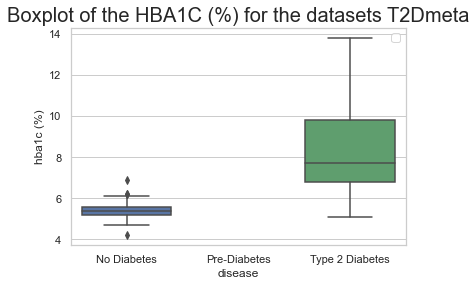

In [84]:
sns.boxplot(y='hbalc',x='disease', data=disease_short,
            order=['No Diabetes','Pre-Diabetes',"Type 2 Diabetes"])
#graphing a histogram
plt.ylabel('hba1c (%)')
#labels=['No Diabetes','Pre-Diabetes',"Type 2 Diabetes"]
plt.title('Boxplot of the HBA1C (%) for the datasets T2Dmeta',fontsize=20 )
plt.legend()
plt.show()


No handles with labels found to put in legend.


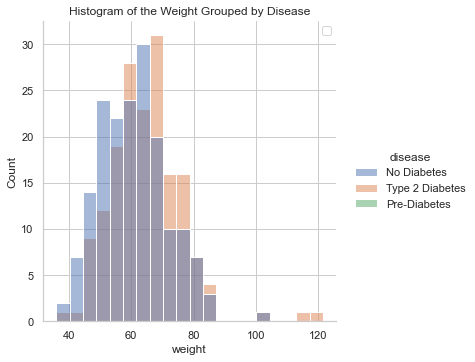

In [85]:
sns.displot(x='weight',hue= "disease",data=disease_short)
#graphing a histogram of the bmi by group datasets
plt.xlabel('weight')
plt.title('Histogram of the Weight Grouped by Disease')
plt.legend()
plt.show()

No handles with labels found to put in legend.


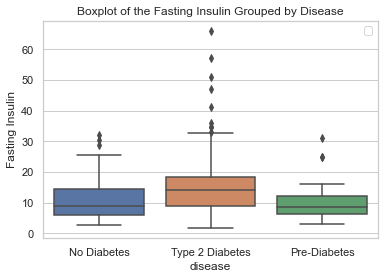

In [86]:
sns.boxplot(y='fasting_insulin',x='disease', data=disease_short)

plt.ylabel('Fasting Insulin')
plt.title('Boxplot of the Fasting Insulin Grouped by Disease')
plt.legend()
plt.show()

No handles with labels found to put in legend.


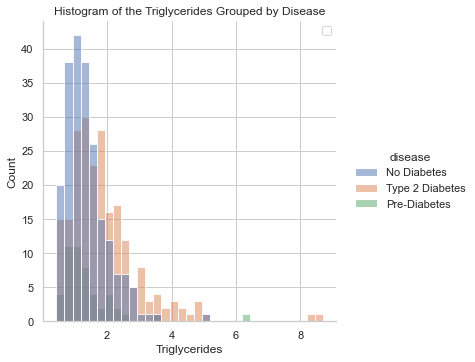

In [87]:
sns.displot(x='triglycerides',hue= "disease",data=disease_short)
#graphing a histogram
plt.xlabel('Triglycerides')
plt.title('Histogram of the Triglycerides Grouped by Disease')
plt.legend()
plt.show()

No handles with labels found to put in legend.


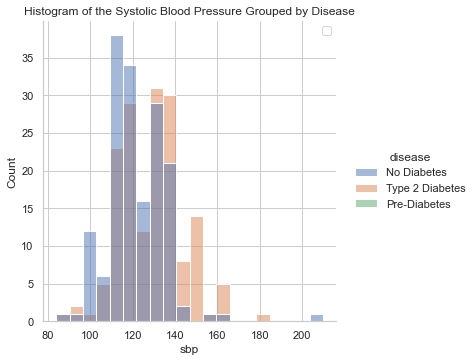

In [88]:
sns.displot(x='sbp',hue= "disease",data=disease_short)
#graphing a histogram
plt.xlabel('sbp')
plt.title('Histogram of the Systolic Blood Pressure Grouped by Disease')
plt.legend()
plt.show()

No handles with labels found to put in legend.


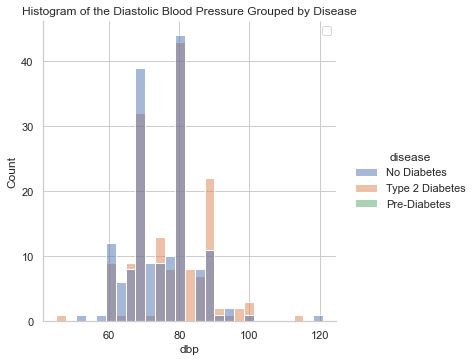

In [89]:

sns.displot(x='dbp',hue= "disease",data=disease_short)
#graphing a histogram
plt.xlabel('dbp')
plt.title('Histogram of the Diastolic Blood Pressure Grouped by Disease')
plt.legend()
plt.show()

No handles with labels found to put in legend.


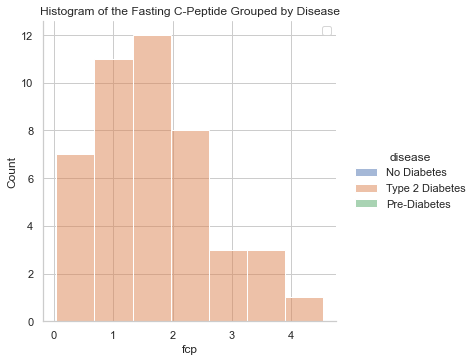

In [90]:
sns.displot(x='fcp',hue= "disease",data=disease_short)
#graphing a histogram
plt.xlabel('fcp')
plt.title('Histogram of the Fasting C-Peptide Grouped by Disease')
plt.legend()
plt.show()

No handles with labels found to put in legend.


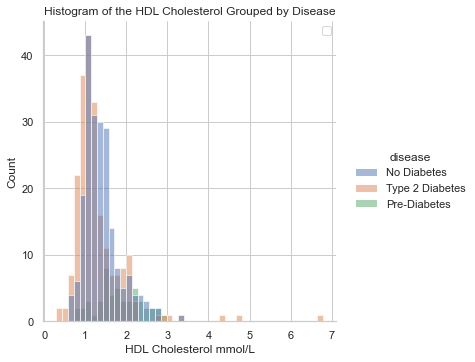

In [91]:
sns.displot(x='hdl',hue= "disease",data=disease_short)
#graphing a histogram
plt.xlabel( 'HDL Cholesterol mmol/L')
plt.title('Histogram of the HDL Cholesterol Grouped by Disease')
plt.legend()
plt.show()

No handles with labels found to put in legend.


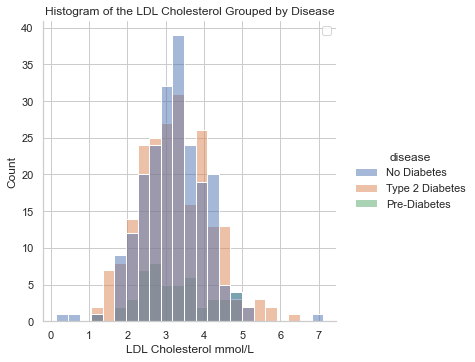

In [92]:
sns.displot(x='ldl',hue= "disease",data=disease_short)
plt.xlabel( 'LDL Cholesterol mmol/L')
plt.title('Histogram of the LDL Cholesterol Grouped by Disease')
plt.legend()
plt.show()

No handles with labels found to put in legend.


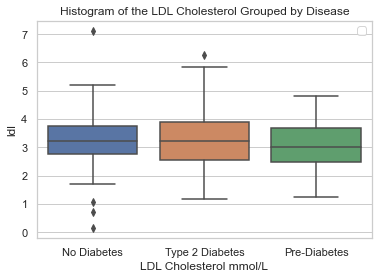

In [93]:
sns.boxplot(y='ldl',x='disease', data=disease_short)
#graphing a histogram
plt.xlabel( 'LDL Cholesterol mmol/L')
plt.title('Histogram of the LDL Cholesterol Grouped by Disease')
plt.legend()
plt.show()